## Task
$y^{''} (t) = sin (t),\, y(0) = 0,\, y (3\pi) = -2$  
As a result of the calculations, a solution should be obtained in the form of 10,000 points on the segment $[0; 3\pi]$

In [362]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.integrate import solve_ivp
from tqdm import tqdm
from numba import jit
%matplotlib inline

In [336]:
#Analytical solution
y_theo = lambda t: -2/3/np.pi*t-np.sin(t)

In [342]:
#With scipy and while loop

from scipy.integrate import solve_ivp

def shooting(y0, y1, t0, t1, N, y_2=lambda t: np.sin(t), tol=1e-5):
    T = np.linspace(t0, t1, N)
    F = lambda t, S: np.array([[0,1],[0, y_2(t)/S[1]]]) @ S
    error = np.Inf
    guess = 1e-38
    right_boundary = np.Inf
    left_boundary = -np.Inf
    
    while error > tol:
        
        solution = solve_ivp(F, [t0, t1], [y0, guess], t_eval = T)
        error = solution.y[0,-1] - y1
             
        if error > 0:
            right_boundary = np.minimum(right_boundary, guess)
            if np.isinf(left_boundary):
                a = np.random.normal(100,10)
                guess = right_boundary - np.sign(a)*a
            else:
                guess = (left_boundary+right_boundary)/2

        else:
            left_boundary = np.maximum(left_boundary, guess)
            if np.isinf(right_boundary):
                a = np.random.normal(100,10)
                guess = left_boundary + np.sign(a)*a
            else:
                guess = (left_boundary+right_boundary)/2
                
        error = np.abs(error)

    return solution

95.8 ms ± 27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


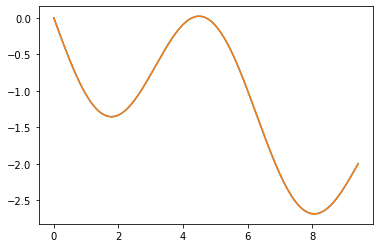

In [344]:
%timeit shooting(0, -2, 0, 3*np.pi, 10000, tol=1e-8)
solution = shooting(0, -2, 0, 3*np.pi, 10000, tol=1e-8)
plt.plot(solution.t, solution.y[0])
plt.plot(solution.t, y_theo(solution.t))

In [354]:
#With scipy and fixed number of iterations

from scipy.integrate import solve_ivp

def shooting(y0, y1, t0, t1, N, y_2 = lambda t: np.sin(t), n_iterations = np.int(1e+6)):
    T = np.linspace(t0, t1, N)
    F = lambda t, S: np.array([[0,1],[0, y_2(t)/S[1]]]) @ S
    error = np.Inf
    guess = 1e-38
    right_boundary = np.Inf
    left_boundary = -np.Inf
    
    for _ in tqdm(range(n_iterations)):
        
        solution = solve_ivp(F, [t0, t1], [y0, guess], t_eval = T)
        error = solution.y[0,-1] - y1
        
        if error > 0:
            right_boundary = np.minimum(right_boundary, guess)
            if np.isinf(left_boundary):
                a = np.random.normal(100,10)
                guess = right_boundary - np.sign(a)*a
            else:
                guess = (left_boundary+right_boundary)/2

        else:
            left_boundary = np.maximum(left_boundary, guess)
            if np.isinf(right_boundary):
                a = np.random.normal(100,10)
                guess = left_boundary + np.sign(a)*a
            else:
                guess = (left_boundary+right_boundary)/2
                
    return solution

In [390]:
solution = shooting(0, -2, 0, 3*np.pi, 10000, n_iterations = 10**6)
plt.plot(solution.t, solution.y[0])
plt.plot(solution.t, y_theo(solution.t))
print(solution.y[0,-1])